In [127]:
from resources.CMUTweetTagger import runtagger_parse
import matplotlib.pyplot as plt
import pandas as pd
import re

In [104]:
tweets_pre = pd.read_csv('data/tweets_preGreta.csv')

`original_retweet_count` and `original_favorite` means that the tweet is not a retweet.

In [105]:
tweets_pre.head()

,created_at,id,text,retweet_count,favorite_count,original_retweet_count,original_favorite
0,Tue Jun 12 00:09:46 +0000 2018,1006327664976617472,Our new paper in @NatureClimate shows that tem...,0,0,32.0,50.0
1,Tue Jun 12 00:09:40 +0000 2018,1006327640226189318,“The transition to accessible and clean energy...,0,0,128.0,174.0
2,Tue Jun 12 00:09:26 +0000 2018,1006327582235688961,"The federal government won't lead on climate, ...",0,0,1349.0,2434.0
3,Tue Jun 12 00:09:26 +0000 2018,1006327581556084736,Extreme Hurricane Rainfall Expected to Increas...,1,0,NaN,NaN
4,Tue Jun 12 00:09:14 +0000 2018,1006327528397697025,"""UN Women: Women To Be Heard When Tackling Cli...",2,1,NaN,NaN


## Tag tweets

In [106]:
ARK_TWEET_NLP_PATH = 'java -XX:ParallelGCThreads=2 -Xmx500m -jar resources/ark-tweet-nlp-0.3.2/ark-tweet-nlp-0.3.2.jar'

tagged_tweets = runtagger_parse(tweets_pre['text'].values, run_tagger_cmd=ARK_TWEET_NLP_PATH)

In [107]:
tagged_tweets[0]

[('Our', 'D', 0.9918),
 ('new', 'A', 0.998),
 ('paper', 'N', 0.9881),
 ('in', 'P', 0.9948),
 ('@NatureClimate', '@', 0.978),
 ('shows', 'V', 0.987),
 ('that', 'D', 0.8964),
 ('temperature', 'N', 0.9922),
 ('goals', 'N', 0.9671),
 ('alone', 'R', 0.7253),
 ('are', 'V', 0.9867),
 ('not', 'R', 0.9995),
 ('sufficient', 'A', 0.9398),
 ('for', 'P', 0.9987),
 ('understanding', 'V', 0.8635),
 ('future', 'A', 0.4472),
 ('#extremeweather', '#', 0.4919),
 ('-', ',', 0.8946),
 ('composition', 'N', 0.9941),
 ('limits', 'N', 0.9563),
 ('also', 'R', 0.9916),
 ('needed', 'V', 0.9335),
 ('@BristolUni', '@', 0.9985),
 ('@ecioxford', '@', 0.9984),
 ('@cabotinstitute', '@', 0.9984),
 ('@ssparrow01', '@', 0.9978),
 ('#climatechange', '#', 0.9048),
 ('https://t.co/nUhw7XtRcM', 'U', 0.9931)]

In [109]:
def create_words_df(df, tagged_tweets):
    # Keep only nouns (N), verbs (V), adverbs (R), adjectives (A), pronoun (O) 
    # For now keep also hashtags
    tweets_words = list()
    for i, tags in enumerate(tagged_tweets):
        tweet_id = df.loc[i, 'id']
        for word, tag, conf in tags:
            if tag in ["#", 'N', 'V', 'R', 'A', 'O']:
                tweets_words.append({
                    'id':tweet_id,
                    'word': word.lower(),
                    'tag': tag,
                    'conf': conf
                })
                
    return pd.DataFrame(tweets_words)

In [122]:
words_pre = create_words_df(tweets_pre, tagged_tweets)
words.head()

,id,word,tag,conf
0,1006327664976617472,new,A,0.9980
1,1006327664976617472,paper,N,0.9881
2,1006327664976617472,shows,V,0.9870
3,1006327664976617472,temperature,N,0.9922
4,1006327664976617472,goals,N,0.9671


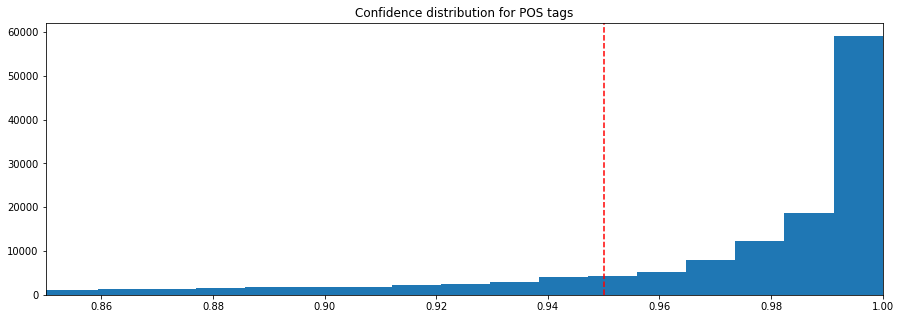

In [123]:
# check confidence
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Confidence distribution for POS tags')
_ = ax.hist(words_pre.conf, bins=100)
_ = ax.set_xlim(left=0.85, right=1.0)
_ = ax.axvline(x=0.95, c='r', ls='--')
_ = plt.show()

In [124]:
words_pre = words_pre[words_pre['conf'] > 0.95]

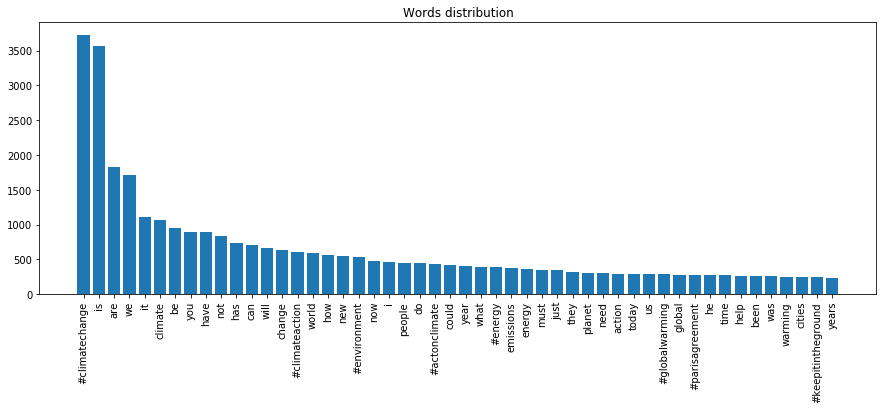

In [125]:
word_counts = words_pre.word.value_counts()
word_counts = word_counts[:50]

# Plot words count
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Words distribution')
_ = ax.bar(x=word_counts.keys().tolist(), height=word_counts.tolist())
_ = ax.tick_params(axis='x', rotation=90)
_ = plt.plot()

In [129]:
words_pre.word = words_pre.word.apply(lambda x: re.sub(r'[#]', '', x))